In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline

# Nivell 1
#### Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [2]:
#Leemos dataset y cogemos una muestra de 3000 registros
df=pd.read_csv('Desktop/DataScience/datasets/DelayedFlights/DelayedFlights.csv')
df=df.sample(3000)
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1094229,3640346,2008,7,13,7,1556.0,1550,1717.0,1715,WN,...,3.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
586523,1826144,2008,4,14,1,959.0,945,1144.0,1140,WN,...,3.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
289409,922910,2008,2,27,3,1225.0,1215,1400.0,1356,EV,...,5.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
958059,3218562,2008,6,14,6,2018.0,2010,2231.0,2228,UA,...,17.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1301317,4357865,2008,8,13,3,1344.0,1329,1503.0,1443,XE,...,4.0,28.0,0,N,0,7.0,0.0,5.0,0.0,8.0


In [3]:
#miramos si hay nulos
df.isnull().sum().sum()

5470

In [4]:
#eliminamos nulos
df=df.dropna()

In [5]:
df.shape

(1919, 30)

In [6]:
#eliminamos features que no nos interesan
df.drop(['Unnamed: 0', 'Year','Month','DayofMonth','DayOfWeek','TailNum','FlightNum','Origin','Dest','Cancelled','Diverted'],'columns',inplace=True)

In [7]:
X_train,X_test= train_test_split(df,test_size=0.3,random_state=42)

In [8]:
X_train.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,1565.679821,1490.804170,1644.368578,1671.918838,131.302308,127.607595,103.770663,63.082651,59.387937,710.743112,6.956069,20.575577,19.795235,3.027550,14.042442,0.062547,26.154877
std,444.066454,415.236895,564.596521,442.517431,70.290653,67.321327,66.241201,56.921206,56.090695,548.434867,5.018922,16.296207,42.701968,16.111617,29.037780,0.943543,43.654583
min,8.000000,40.000000,1.000000,5.000000,31.000000,30.000000,14.000000,15.000000,6.000000,56.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1239.000000,1157.000000,1351.500000,1357.500000,82.500000,80.000000,58.000000,27.000000,25.000000,330.500000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1622.000000,1535.000000,1751.000000,1729.000000,115.000000,111.000000,86.000000,45.000000,42.000000,573.000000,6.000000,16.000000,2.000000,0.000000,1.000000,0.000000,10.000000
75%,1922.000000,1825.000000,2047.000000,2023.500000,160.000000,155.000000,129.000000,77.000000,76.000000,930.500000,8.000000,24.000000,21.500000,0.000000,15.000000,0.000000,34.000000
max,2352.000000,2320.000000,2400.000000,2359.000000,540.000000,556.000000,513.000000,625.000000,658.000000,4243.000000,76.000000,143.000000,625.000000,223.000000,300.000000,26.000000,390.000000


In [9]:
X_test.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.0,576.000000
mean,1560.065972,1494.880208,1641.008681,1654.095486,133.338542,128.833333,104.989583,64.760417,60.255208,711.385417,7.043403,21.305556,20.461806,4.180556,15.548611,0.0,24.569444
std,467.527646,430.802666,579.049483,474.097979,67.378735,63.360007,63.569721,57.626578,56.323313,508.128738,4.947360,18.405397,40.031404,21.608663,35.073405,0.0,41.523324
min,24.000000,110.000000,1.000000,10.000000,32.000000,34.000000,17.000000,15.000000,6.000000,67.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1213.750000,1131.500000,1332.750000,1339.750000,82.000000,80.000000,57.000000,26.000000,23.000000,316.750000,4.000000,11.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1625.500000,1546.500000,1756.500000,1741.000000,118.000000,115.000000,88.500000,44.000000,40.000000,591.000000,6.000000,16.000000,3.000000,0.000000,2.000000,0.0,6.000000
75%,1934.750000,1841.000000,2102.000000,2030.000000,168.000000,160.000000,134.000000,82.000000,78.000000,938.250000,9.000000,24.000000,23.000000,0.000000,15.000000,0.0,33.000000
max,2350.000000,2359.000000,2400.000000,2359.000000,370.000000,351.000000,330.000000,388.000000,373.000000,2603.000000,51.000000,192.000000,373.000000,260.000000,301.000000,0.0,296.000000


Si hubiéramos escogido todo el dataset los datos estadísticos obtenidos en ambos conjuntos serían muy similares. Son datasets muy grandes de forma que el sesgo que existiría entre ambos conjuntos sería muy pequeño. Las medias, desviaciones y distribución serían casi iguales.

Ahora al escoger "solo" una muestra aleatoria de 3000 registros y dividirla en X_train y X_test, con el 70% y 30% de muestras respectivamente, las diferencias estadísticas siguen siendo pequeñas aunque son mayores que en el primer caso.

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 213113 to 1221099
Data columns (total 19 columns):
DepTime              1343 non-null float64
CRSDepTime           1343 non-null int64
ArrTime              1343 non-null float64
CRSArrTime           1343 non-null int64
UniqueCarrier        1343 non-null object
ActualElapsedTime    1343 non-null float64
CRSElapsedTime       1343 non-null float64
AirTime              1343 non-null float64
ArrDelay             1343 non-null float64
DepDelay             1343 non-null float64
Distance             1343 non-null int64
TaxiIn               1343 non-null float64
TaxiOut              1343 non-null float64
CancellationCode     1343 non-null object
CarrierDelay         1343 non-null float64
WeatherDelay         1343 non-null float64
NASDelay             1343 non-null float64
SecurityDelay        1343 non-null float64
LateAircraftDelay    1343 non-null float64
dtypes: float64(14), int64(3), object(2)
memory usage: 209.8+ KB


Tenemos 19 features numéricas y 2 variables categóricas

**Boxplot**

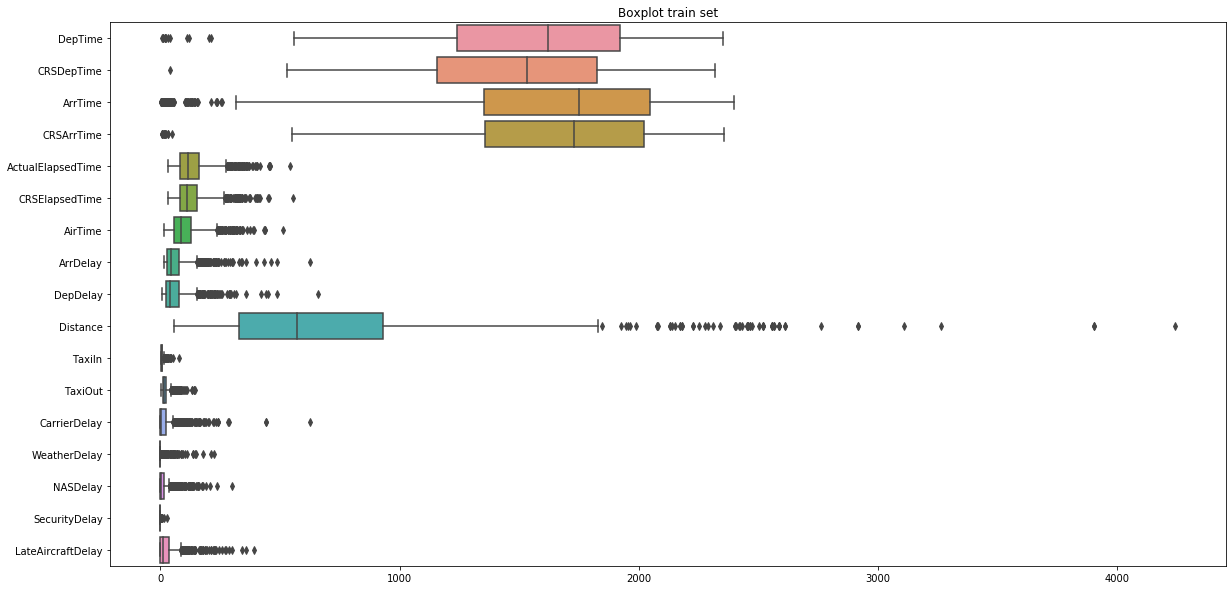

In [11]:
#boxplot x_train
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train,orient='h')
plt.title('Boxplot train set')
plt.show()

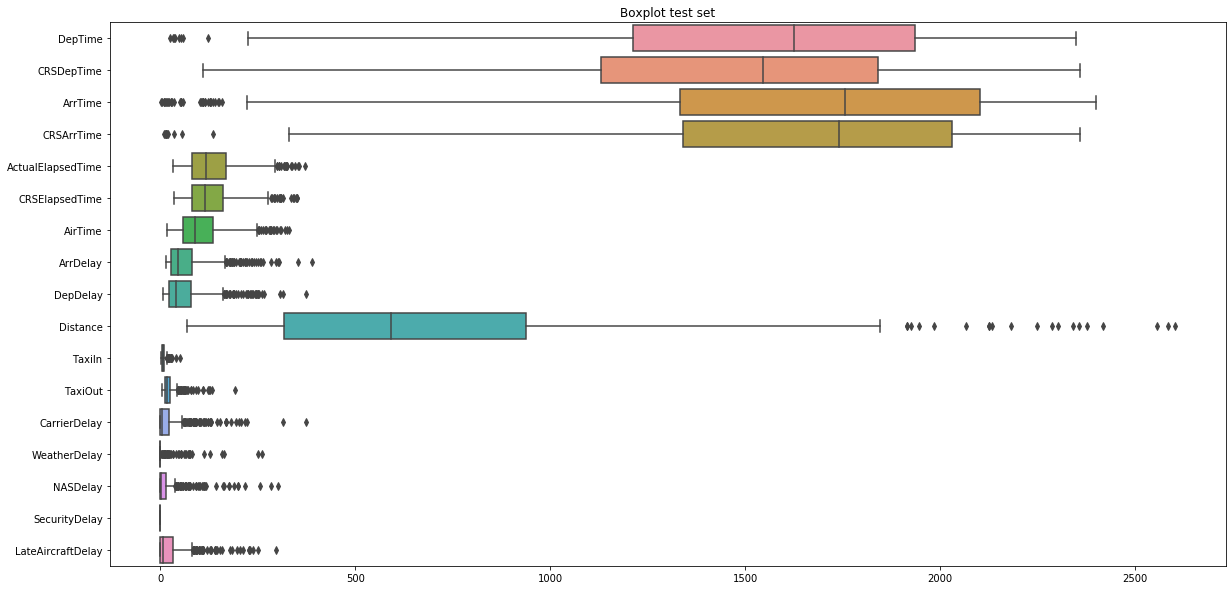

In [12]:
#boxplot x_test
plt.figure(figsize=(20,10))
sns.boxplot(data=X_test,orient='h')
plt.title('Boxplot test set')
plt.show()

Vemos, tanto en train como en test, que en todas las features existen outliers,deberemos tratarlos si queremos aplicar en un un futuro algún algoritmo ya que pueden afectar bastante en su rendimiento.
También nos afectará en la forma de la distribución de cada variable y algunas de ellas tendrán skew, por ejemplo: AirTime, ArrDelay,DepDelay, etc.
Por último las features tienen rangos muy distintos por lo que deberemos normalizar los datos.

In [13]:
X_train.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
DepTime,-0.533422,-0.021230
CRSDepTime,-0.305099,-0.782918
ArrTime,-1.221426,1.304225
CRSArrTime,-0.700319,0.479072
ActualElapsedTime,1.641607,3.600228
CRSElapsedTime,1.704715,4.062942
AirTime,1.804502,4.384861
ArrDelay,3.075707,15.767637
DepDelay,3.217671,18.648818
Distance,1.939787,5.202798


In [14]:
X_test.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
DepTime,-0.597606,0.141879
CRSDepTime,-0.335547,-0.739578
ArrTime,-1.197311,1.140278
CRSArrTime,-0.907985,0.988807
ActualElapsedTime,1.064149,0.775429
CRSElapsedTime,1.129092,0.990103
AirTime,1.191132,1.047042
ArrDelay,2.060186,4.976508
DepDelay,1.967350,4.448132
Distance,1.266541,1.352804


Podemos considerar como distribución normal simétrica si el skew está entre (-0.5,0.5), comprobamos que la mayoría de las distribuciones de las features no son simétricas.

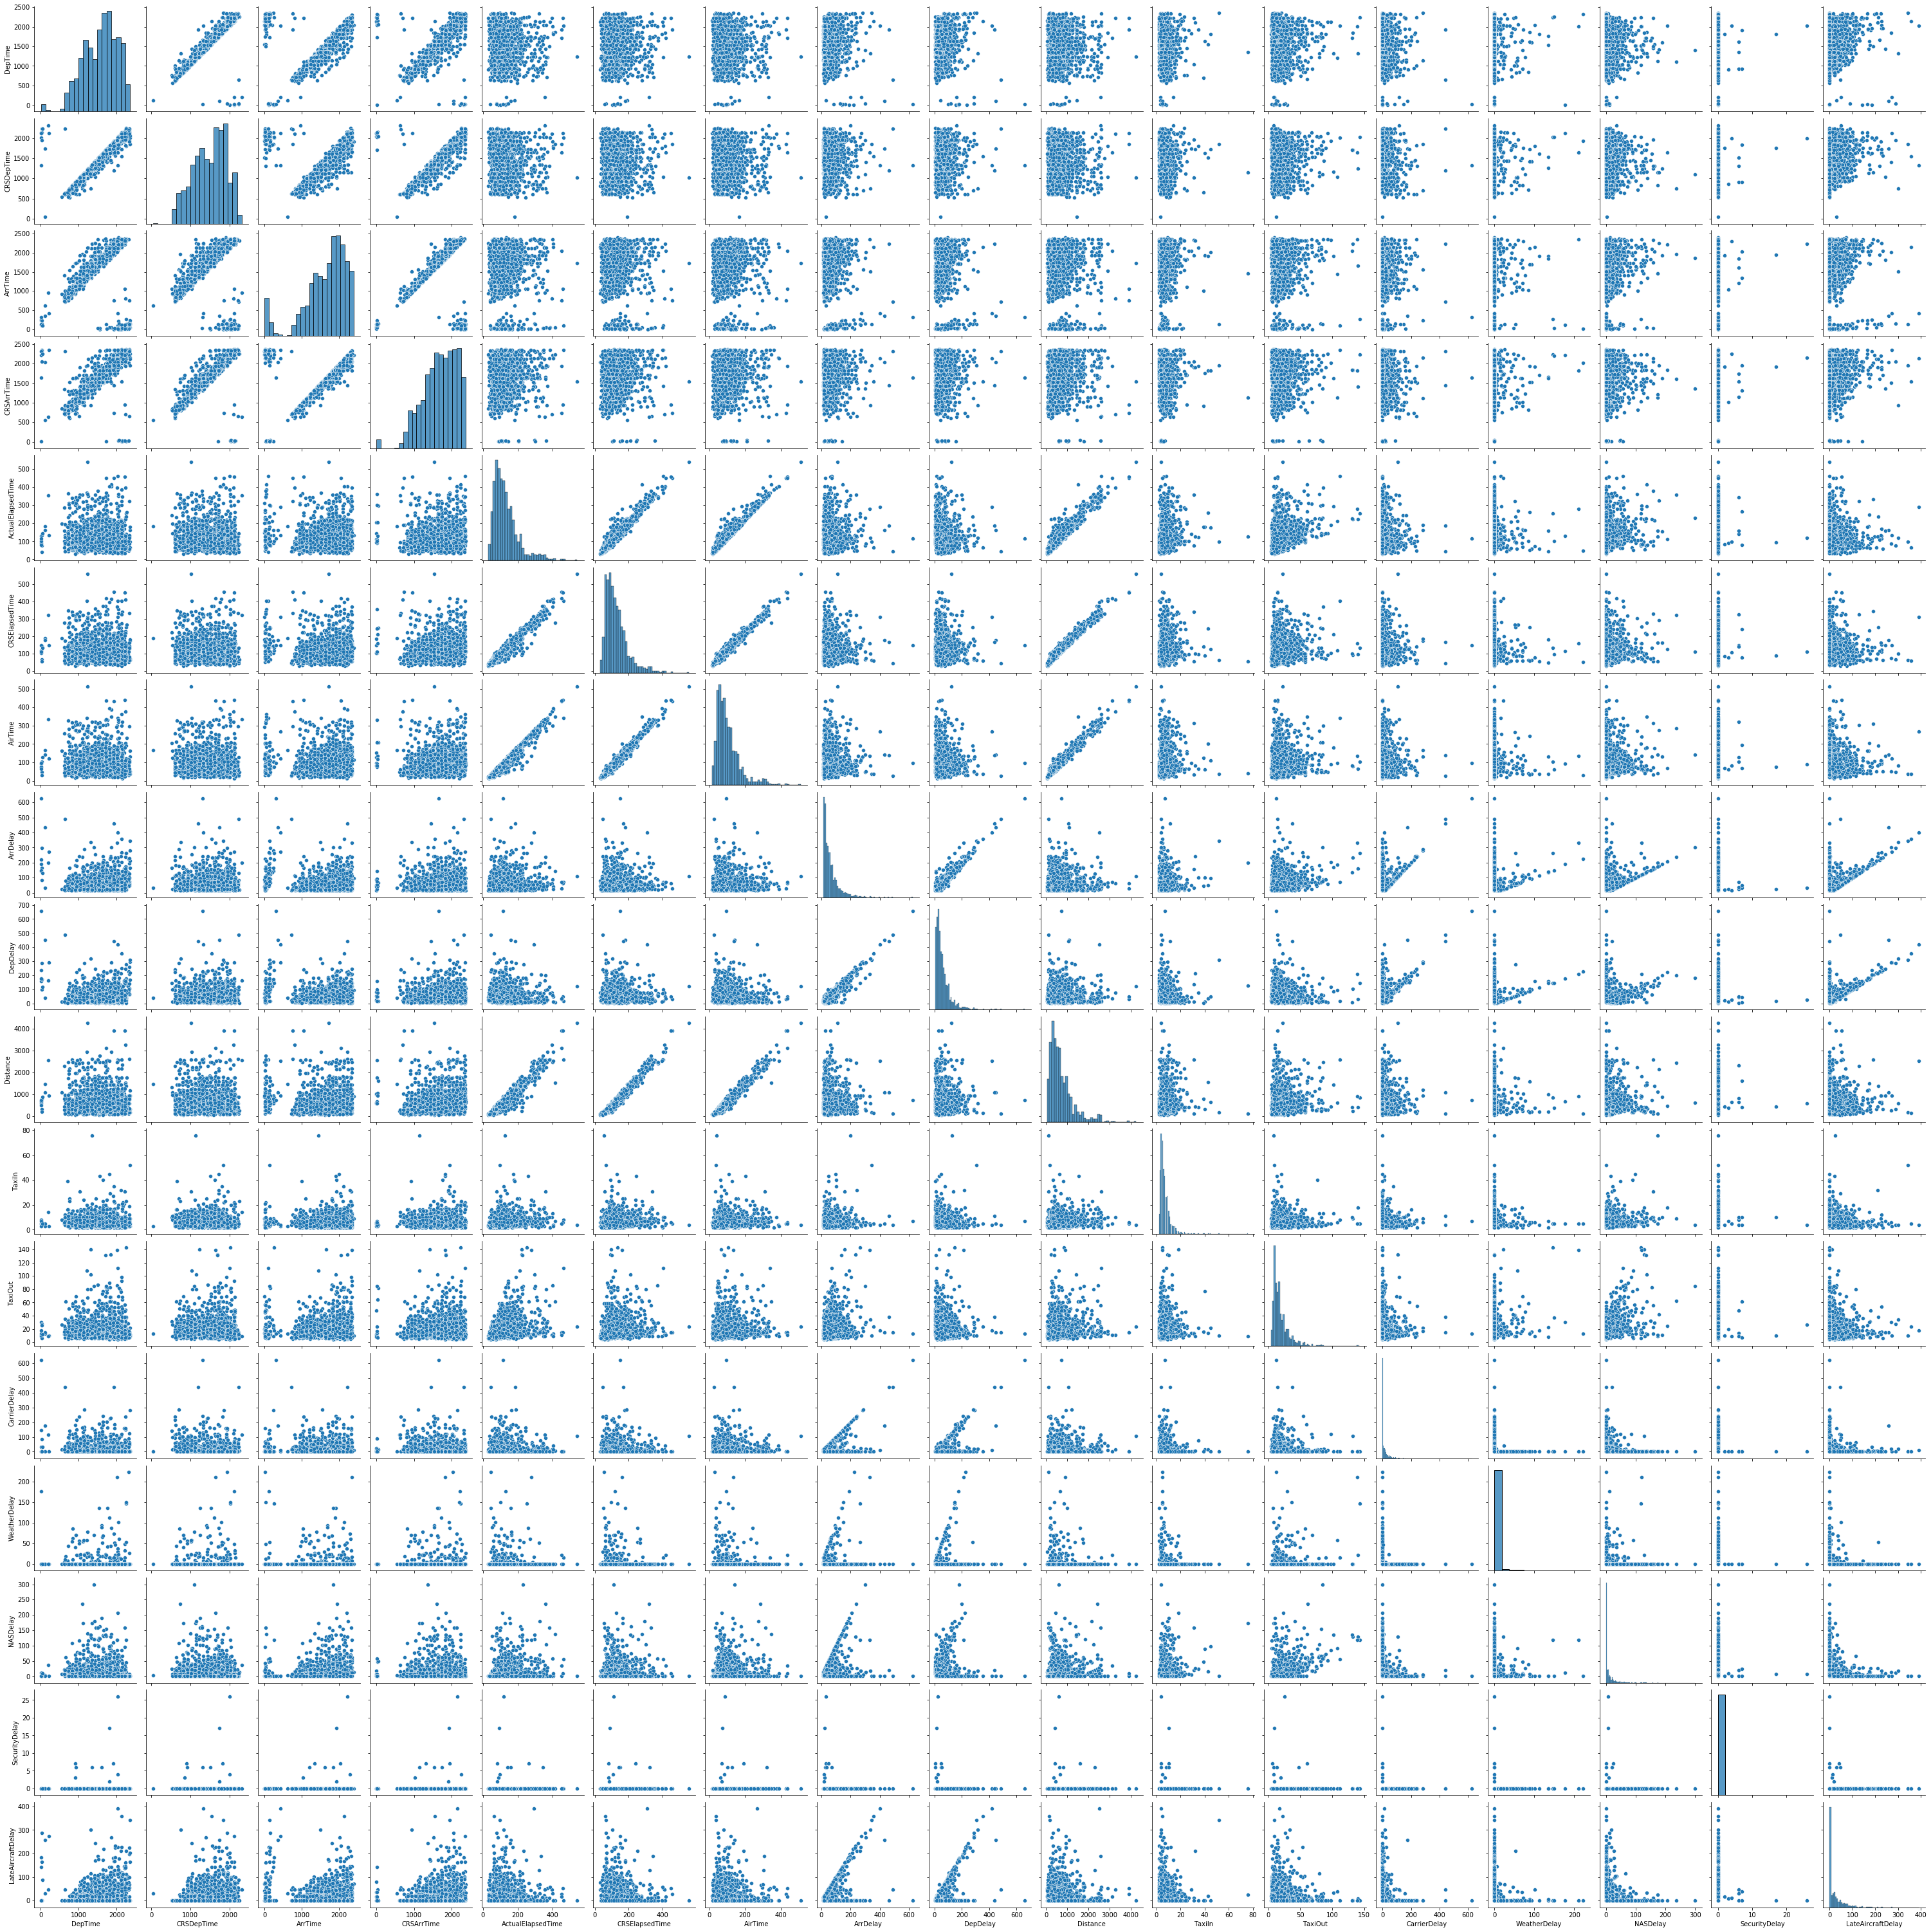

In [15]:
sns.pairplot(data=X_train)
plt.show()

Vemos en la diagonal del pairplot los histogramas de las distintas features. Las únicas que son bastante simétricas DepTime y CRSDepTime

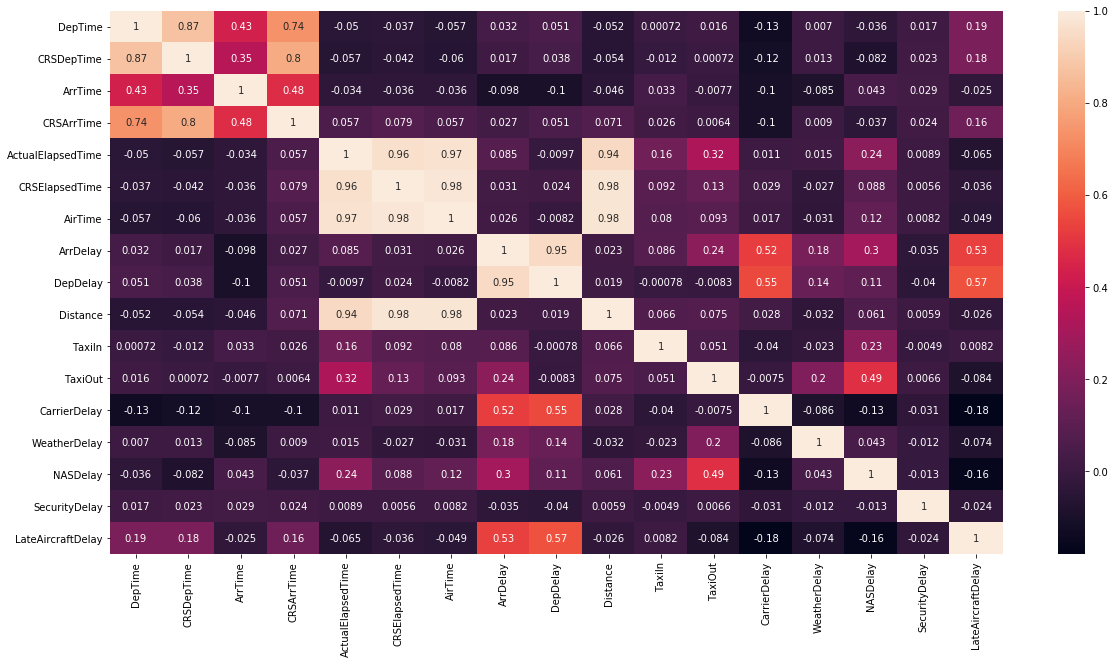

In [16]:
#correlacion X_train
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

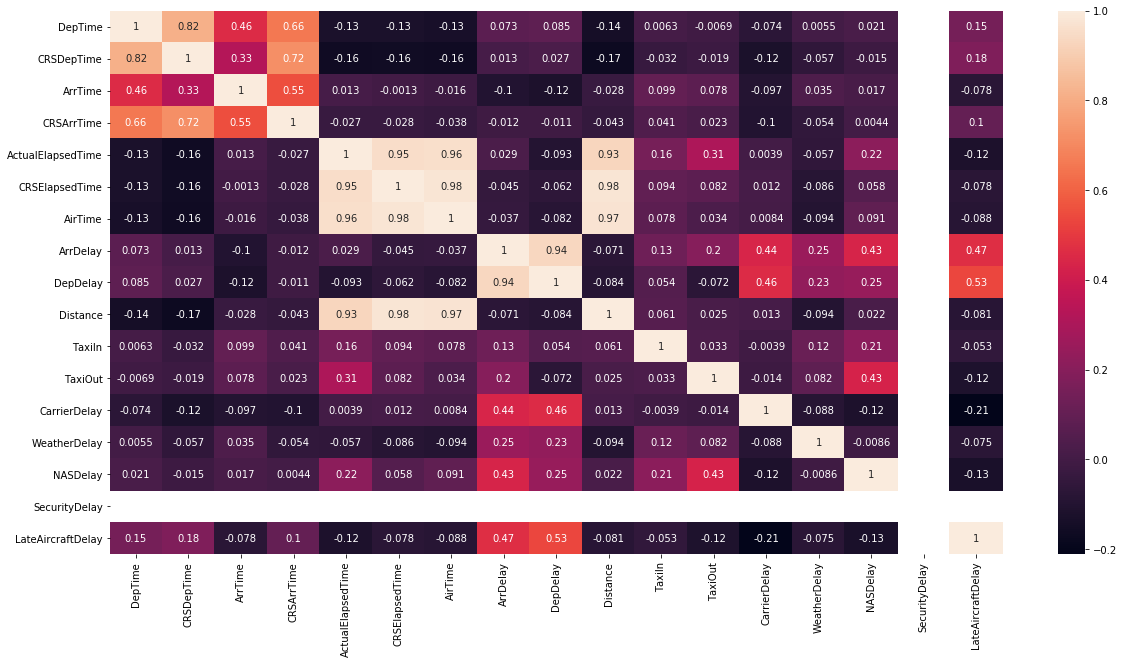

In [17]:
#correlacion X_test
plt.figure(figsize=(20,10))
sns.heatmap(X_test.corr(), annot=True)
plt.show()

Vemos que hay unas cuantas variables que están correladas, por lo que podremos prescindir de alguna de ellas si aplicamos algún algoritmo como la regresión múltiple.

Tanto en train set y test set las features ActualElapsedTime, CRSElapsedTime, AirTime y Distance están correladas. En menor medida también lo están DepTime, CRSDepTime,ArrTime y CRSArrTime

# Nivell 2
#### Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

**Creación variables polinómicas**

Vamos a crear varias variables polinómicas a partir de x=DepTime y y=ArrTime con grado 2. Se generan 6 columnas con:
- Constante  con valor 1
- x con valor DepTime
- y con valor ArrTime
- xy con valor DepTime*ArrTime
- x<sup>2</sup> con valor DepTime<sup>2</sup>
- y<sup>2</sup> con valor ArrTime<sup>2</sup>

In [18]:
cols=['constant','DepTime','ArrTime','Dep*Arr','Dep**2','Arr**2']
trans = PolynomialFeatures(degree=2)
pols=trans.fit_transform(df[['DepTime','ArrTime']])
pols=pd.DataFrame(pols, columns=cols, index=df.index)
pols.head()

,constant,DepTime,ArrTime,Dep*Arr,Dep**2,Arr**2
1301317,1.0,1344.0,1503.0,1806336.0,2020032.0,2259009.0
785321,1.0,1248.0,1600.0,1557504.0,1996800.0,2560000.0
443787,1.0,730.0,826.0,532900.0,602980.0,682276.0
1288144,1.0,2039.0,211.0,4157521.0,430229.0,44521.0
391350,1.0,1558.0,1648.0,2427364.0,2567584.0,2715904.0


In [19]:
#concatenamos con nuestro dataset
df_pols=pd.concat((df,pols.iloc[:,3:]), axis=1)
df_pols.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Dep*Arr,Dep**2,Arr**2
1301317,1344.0,1329,1503.0,1443,XE,79.0,74.0,47.0,20.0,15.0,...,28.0,N,7.0,0.0,5.0,0.0,8.0,1806336.0,2020032.0,2259009.0
785321,1248.0,1131,1600.0,1452,OO,132.0,141.0,109.0,68.0,77.0,...,19.0,N,0.0,0.0,0.0,0.0,68.0,1557504.0,1996800.0,2560000.0
443787,730.0,700,826.0,805,OO,56.0,65.0,41.0,21.0,30.0,...,10.0,N,21.0,0.0,0.0,0.0,0.0,532900.0,602980.0,682276.0
1288144,2039.0,1835,211.0,2355,WN,212.0,200.0,171.0,136.0,124.0,...,34.0,N,0.0,0.0,12.0,0.0,124.0,4157521.0,430229.0,44521.0
391350,1558.0,1525,1648.0,1620,WN,50.0,55.0,40.0,28.0,33.0,...,7.0,N,0.0,0.0,0.0,0.0,28.0,2427364.0,2567584.0,2715904.0


**Eliminación outliers**

In [20]:
#Eliminamos muestras con outliers
Q1 = df_pols.quantile(0.25)
Q3 = df_pols.quantile(0.75)
IQR = Q3 - Q1
IQR
X_out = df_pols[~((df_pols < (Q1 - 1.5 * IQR)) |(df_pols > (Q3 + 1.5 * IQR))).any(axis=1)]

**Creación variables dummies**

Como vimo antes tenemos dos variables categóricas que debemos pasar a numéricas (dummy variable):

In [21]:
X_out[['UniqueCarrier','CancellationCode']].head()

,UniqueCarrier,CancellationCode
1301317,XE,N
785321,OO,N
443787,OO,N
391350,WN,N
389482,WN,N


In [22]:
#Los valores de estas features son:
len(X_out['UniqueCarrier'].unique())

19

In [23]:
len(X_out['CancellationCode'].unique())

1

CancellationCode solo tiene un valor por lo que todos los datos de X_out pertenecen a la misma clase (N: no cancelado) y podemos obviarla

In [24]:
X_out=X_out.drop(['CancellationCode'],'columns')
X_out_d=pd.get_dummies(data=X_out, columns=['UniqueCarrier'],drop_first=True)

**Estandarizar**

In [25]:
# Estandarizamos restando la media y dividiendo por la desviación
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_out_t=scaler.fit_transform(X_out_d) #devuelve un array NumPy, no un DataFrame

In [26]:
X_out_t=pd.DataFrame(X_out_t, columns=X_out_d.columns,index=X_out_d.index)

In [27]:
X_train,X_test= train_test_split(X_out_t,test_size=0.3,random_state=42)

In [28]:
X_train.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,...,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,0.024050,0.028505,0.020153,0.024514,-0.005706,-0.011103,-0.006817,-0.048570,-0.055368,-0.005041,...,0.004463,-0.026281,0.028796,0.014258,-0.015732,-0.025622,-0.010483,0.014986,0.006697,0.009328
std,0.992871,0.994696,0.996969,0.998963,1.005418,1.002093,1.004907,0.962479,0.957297,1.003617,...,1.035742,0.962483,1.063571,1.040560,0.975958,0.948527,0.977773,1.011145,1.013641,1.024798
min,-2.443959,-2.364040,-2.515119,-2.430394,-1.687382,-1.717784,-1.640112,-1.158151,-1.491728,-1.456158,...,-0.062348,-0.318244,-0.210925,-0.169954,-0.295581,-0.239412,-0.220751,-0.517189,-0.241664,-0.184483
25%,-0.750294,-0.697238,-0.739019,-0.679315,-0.785916,-0.808827,-0.789891,-0.784252,-0.733431,-0.773796,...,-0.062348,-0.318244,-0.210925,-0.169954,-0.295581,-0.239412,-0.220751,-0.517189,-0.241664,-0.184483
50%,0.146498,0.117365,0.162045,0.133686,-0.212257,-0.189083,-0.258503,-0.303525,-0.259495,-0.204287,...,-0.062348,-0.318244,-0.210925,-0.169954,-0.295581,-0.239412,-0.220751,-0.517189,-0.241664,-0.184483
75%,0.882927,0.831709,0.791674,0.846625,0.658477,0.595926,0.612974,0.444273,0.451409,0.590927,...,-0.062348,-0.318244,-0.210925,-0.169954,-0.295581,-0.239412,-0.220751,-0.517189,-0.241664,-0.184483
max,1.880870,1.849335,1.644400,1.654623,3.024824,3.219508,3.142382,3.755951,3.721567,3.191775,...,16.039015,3.142242,4.741020,5.883935,3.383162,4.176892,4.529993,1.933528,4.137971,5.420549


In [29]:
X_test.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,-0.056091,-0.066481,-0.047003,-0.057174,0.013308,0.025895,0.015899,0.113278,0.129133,0.011758,...,-0.010408,0.061293,-0.067159,-0.033254,0.036692,0.059757,0.024449,-0.034951,-0.015619,-0.021756
std,1.017428,1.012352,1.008688,1.003311,0.990369,0.997857,0.991525,1.077093,1.085296,0.994657,...,0.914496,1.083106,0.832761,0.900834,1.056192,1.111623,1.052774,0.975883,0.970536,0.942589
min,-2.310735,-2.226184,-2.485373,-2.405378,-1.666894,-1.738443,-1.533835,-1.158151,-1.444334,-1.408918,...,-0.062348,-0.318244,-0.210925,-0.169954,-0.295581,-0.239412,-0.220751,-0.517189,-0.241664,-0.184483
25%,-0.858846,-0.910288,-0.784878,-0.866930,-0.765429,-0.803662,-0.742066,-0.730838,-0.686037,-0.742303,...,-0.062348,-0.318244,-0.210925,-0.169954,-0.295581,-0.239412,-0.220751,-0.517189,-0.241664,-0.184483
50%,0.004639,0.067236,0.044299,0.102417,-0.150793,-0.158096,-0.173481,-0.196696,-0.093617,-0.168856,...,-0.062348,-0.318244,-0.210925,-0.169954,-0.295581,-0.239412,-0.220751,-0.517189,-0.241664,-0.184483
75%,0.759572,0.790979,0.755731,0.810978,0.668721,0.637242,0.612974,0.657930,0.723922,0.546967,...,-0.062348,-0.318244,-0.210925,-0.169954,-0.295581,-0.239412,-0.220751,-0.517189,-0.241664,-0.184483
max,1.871001,1.784167,1.540288,1.589583,2.881409,2.930295,3.057360,3.382052,3.152843,3.089421,...,16.039015,3.142242,4.741020,5.883935,3.383162,4.176892,4.529993,1.933528,4.137971,5.420549


# Nivell 3
#### Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

**Variables dummies**

Las variables dummies generadas solo tienen dos valores (0,1). Al aplicar estandarización se ven modificadas al restarles la media y dividirlas por la desviación pero siguen siendo dos valores Miramos por ejemplo UniqueCarrier_US, pero el resto de dummies tienen el mismo comportamiento:

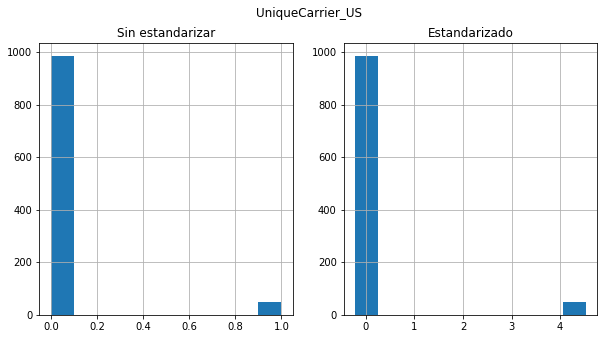

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
X_out_d.UniqueCarrier_US.hist()
plt.title('Sin estandarizar')
plt.subplot(1,2,2)
X_out_t.UniqueCarrier_US.hist()
plt.title('Estandarizado')
plt.suptitle('UniqueCarrier_US')
plt.show()

In [31]:
#Los valores transformados de (0,1)
media=X_out_d.UniqueCarrier_US.mean()
desv=X_out_d.UniqueCarrier_US.std()
np.round((0-media)/desv,3),np.round((1-media)/desv,3) 

(-0.221, 4.528)

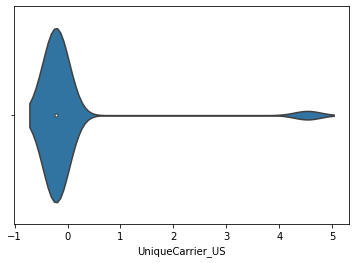

In [32]:
sns.violinplot(x=X_out_t.UniqueCarrier_US)
plt.show()

Vemos que casi todos los valores se concentran entorno a -0.218 y pocos datos en donde se cumple la condición, en este caso que la aerolínea es US.
Como ya comentamos este comportamiento es similar al resto de variables dummies, introducen muchos valores cero (dataset sparse) a nuestro dataset aumentando el tamaño de éste y el coste computacional.

**Variables polinómicas**

In [33]:
pols.describe()

,constant,DepTime,ArrTime,Dep*Arr,Dep**2,Arr**2
count,1919.0,1919.000000,1919.000000,1.919000e+03,1.919000e+03,1.919000e+03
mean,1.0,1563.994789,1643.360083,2.649484e+06,2.683373e+06,3.024024e+06
std,0.0,451.121371,568.823945,1.325424e+06,1.407801e+06,1.538872e+06
min,1.0,8.000000,1.000000,6.400000e+01,1.452000e+03,1.000000e+00
25%,1.0,1229.000000,1347.500000,1.510441e+06,1.558100e+06,1.815756e+06
50%,1.0,1625.000000,1752.000000,2.640625e+06,2.753720e+06,3.069504e+06
75%,1.0,1926.500000,2053.000000,3.711402e+06,3.848418e+06,4.214809e+06
max,1.0,2352.000000,2400.000000,5.531904e+06,5.496660e+06,5.760000e+06


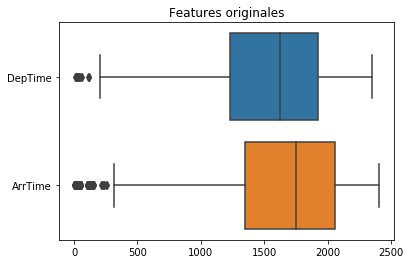

In [34]:
sns.boxplot(data=pols[['DepTime','ArrTime']], orient='h')
plt.title('Features originales')
plt.show()

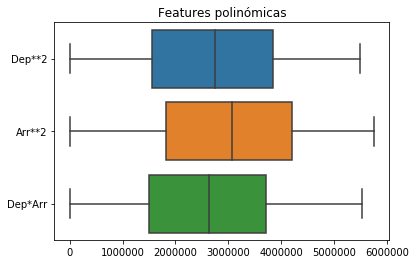

In [36]:
sns.boxplot(data=pols[['Dep**2','Arr**2','Dep*Arr']], orient='h')
plt.title('Features polinómicas')
plt.show()

Vemos que DepTime y ArrTime tienen outliers y que son distribuciones con asimetría negativa mientras que las variables polinómicas (gráfico inferior) no tienen outliers y sus distribuciones son mucho más simétricas. En cambio los rangos de éstas últimas son mucho más grandes que el de DepTime y ArrTime. Por tanto conseguimos reducir outliers y mejoramos la simetría de la distribución pero en cambio ensanchamos el rango de valores

**Histograma y Q-Q plot**

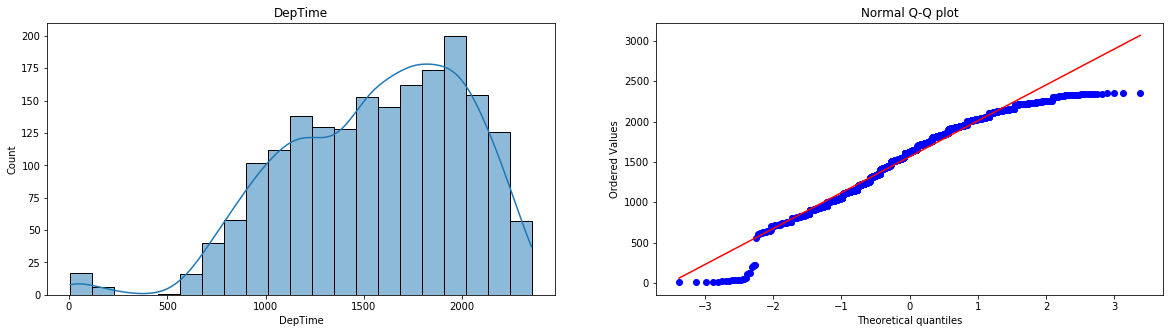

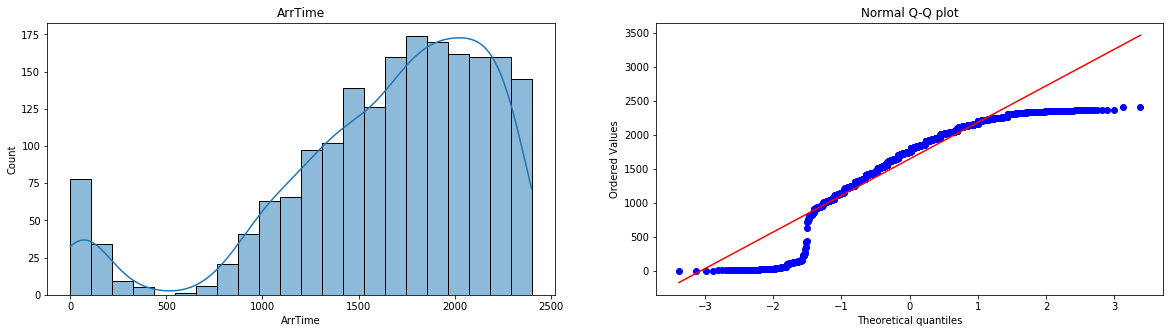

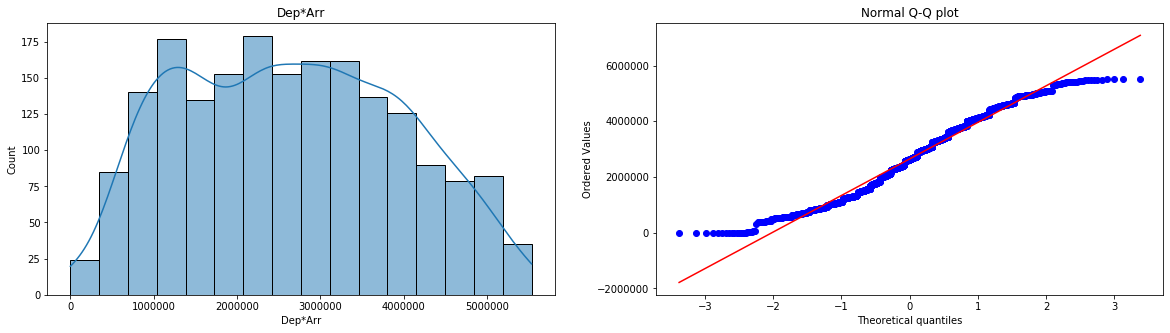

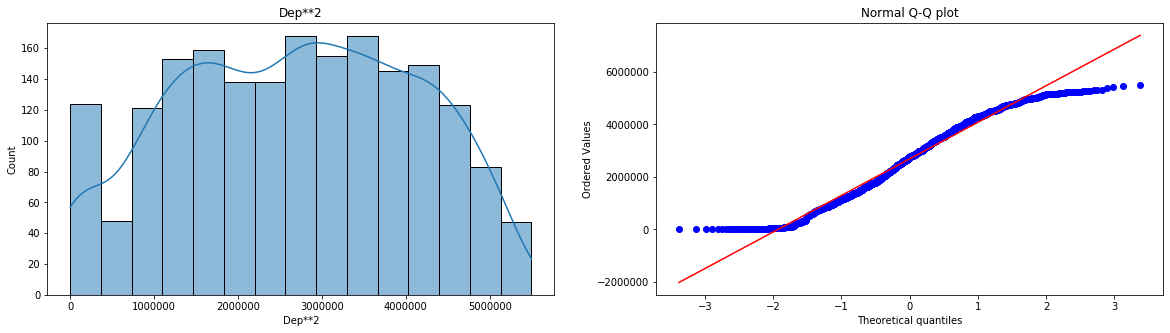

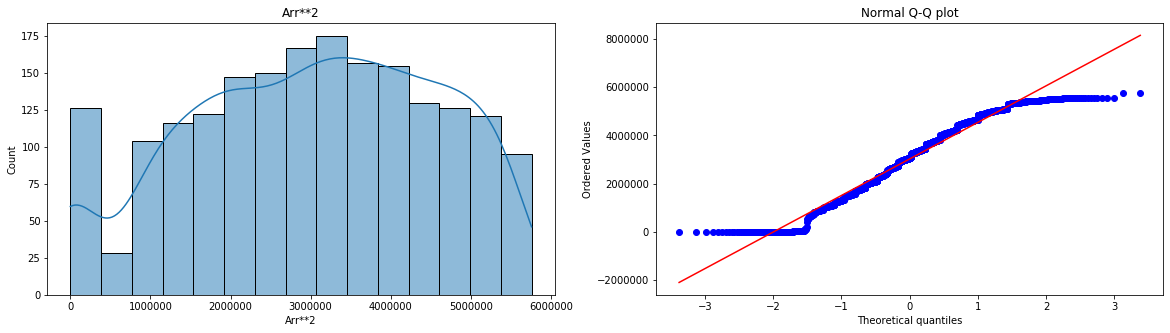

In [37]:
for i in pols.columns[1:]:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.histplot(pols[i],kde=True)
    plt.title(i)
    plt.subplot(1,2,2)
    st.probplot(pols[i], dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    plt.show()

Las dos primeras son nuestras columnas iniciales DepTime y ArrTime, vemos su asimetría negativa. El resto de histogramas corresponden a las columnas polinómicas vemos en los gráficos Q-Q que mejoran un poco su comportamiento normal.